#Predicción de Tumores Malignos

## Objetivo del problema

Desarrollar un modelo de clasificación binaria basado en Deep Learning capaz de predecir la probabilidad de que un tumor sea maligno o benigno, utilizando información del tumor tales como su radio, textura, perímetro, área, suavidad, compacidad, concavidad, puntos cóncavos, simetría y dimensión fractal.

El modelo tendrá como objetivo clasificar si el tumor es maligno (diagnosis = 1) o benigno (diagnosis = 0), basado en los patrones encontrados en los datos de entrenamiento.

Este modelo sirve como apoyo a la toma de decisiones médicas y mejorar el diagnóstico de detección de cánceres malignos.

## Descripción de los datos

La siguiente tabla contiene la información de los datos que se utilizarán para construir la red neuronal.


| Columna                 | Tipo lógico | Observación                                  |
| ----------------------- | ----------- | -------------------------------------------- |
| radius_mean             | Numérica    | Media del radio del núcleo                   |
| texture_mean            | Numérica    | Media de la textura                          |
| perimeter_mean          | Numérica    | Media del perímetro                          |
| area_mean               | Numérica    | Media del área                               |
| smoothness_mean         | Numérica    | Media de la suavidad                         |
| compactness_mean        | Numérica    | Media de la compacidad                       |
| concavity_mean          | Numérica    | Media de la concavidad                       |
| concave_points_mean     | Numérica    | Media de puntos cóncavos                     |
| symmetry_mean           | Numérica    | Media de la simetría                         |
| fractal_dimension_mean  | Numérica    | Media de la dimensión fractal                |
| radius_se               | Numérica    | Error estándar del radio                     |
| texture_se              | Numérica    | Error estándar de la textura                 |
| perimeter_se            | Numérica    | Error estándar del perímetro                 |
| area_se                 | Numérica    | Error estándar del área                      |
| smoothness_se           | Numérica    | Error estándar de la suavidad                |
| compactness_se          | Numérica    | Error estándar de la compacidad              |
| concavity_se            | Numérica    | Error estándar de la concavidad              |
| concave_points_se       | Numérica    | Error estándar de puntos cóncavos            |
| symmetry_se             | Numérica    | Error estándar de la simetría                |
| fractal_dimension_se    | Numérica    | Error estándar de la dimensión fractal       |
| radius_worst            | Numérica    | Valor máximo del radio                       |
| texture_worst           | Numérica    | Valor máximo de la textura                   |
| perimeter_worst         | Numérica    | Valor máximo del perímetro                   |
| area_worst              | Numérica    | Valor máximo del área                        |
| smoothness_worst        | Numérica    | Valor máximo de la suavidad                  |
| compactness_worst       | Numérica    | Valor máximo de la compacidad                |
| concavity_worst         | Numérica    | Valor máximo de la concavidad                |
| concave_points_worst    | Numérica    | Valor máximo de puntos cóncavos              |
| symmetry_worst          | Numérica    | Valor máximo de la simetría                  |
| fractal_dimension_worst | Numérica    | Valor máximo de la dimensión fractal         |
| **diagnosis**           | Nominal     | Variable objetivo (1 = maligno, 0 = benigno) |


<br>

> Los datos ya fueron previamente tratados para su uso.

In [57]:
#@title # 0. Importando librerias y conjunto de datos

import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

from pathlib import Path

import tensorflow as tf
from tensorflow import keras


from src.data_processor import DataProcessor, process_new_data_with_artifacts
from src.load_from_zip import load_processed_data_from_zip
from src.save_to_zip import save_processed_data_to_zip
from src.neural_net_designer import BinaryClassificationDesigner

SEED = 123

warnings.filterwarnings('ignore')

np.random.seed(SEED)
tf.random.set_seed(SEED)

datapath = Path('data')
processed_path = datapath / 'processed'
processed_path.mkdir(parents=True, exist_ok=True)



## 1. Transformando datos a entrenamiento, prueba y validación.

In [2]:
#@title ### 1.1 Cargando datos e inspecciónr rápida

cancer_df = pd.read_csv(datapath / 'cancer.csv')
cancer_df.sample(n = 7, random_state = SEED)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
275,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.25420,0.2929,0.09873,1
75,14.74,25.42,94.70,668.6,0.08275,0.07214,0.04105,0.03027,0.1840,0.05680,...,32.29,107.40,826.4,0.1060,0.1376,0.1611,0.10950,0.2722,0.06956,0
202,12.87,16.21,82.38,512.2,0.09425,0.06219,0.03900,0.01615,0.2010,0.05769,...,23.64,89.27,597.5,0.1256,0.1808,0.1992,0.05780,0.3604,0.07062,0
196,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,0.06147,...,27.27,105.90,733.5,0.1026,0.3171,0.3662,0.11050,0.2258,0.08004,0
260,18.81,19.98,120.90,1102.0,0.08923,0.05884,0.08020,0.05843,0.1550,0.04996,...,24.30,129.00,1236.0,0.1243,0.1160,0.2210,0.12940,0.2567,0.05737,1
118,15.78,22.91,105.70,782.6,0.11550,0.17520,0.21330,0.09479,0.2096,0.07331,...,30.50,130.30,1272.0,0.1855,0.4925,0.7356,0.20340,0.3274,0.12520,1
547,11.80,17.26,75.26,431.9,0.09087,0.06232,0.02853,0.01638,0.1847,0.06019,...,24.49,86.00,562.0,0.1244,0.1726,0.1449,0.05356,0.2779,0.08121,0


In [3]:
cancer_df.shape

(559, 31)

In [4]:
balance = (cancer_df['target'].value_counts() / cancer_df.shape[0]).round(4)


print(f"La clase 1 representa el {balance[1]*100}% de los datos. Mientras que la clase 0 representa el {balance[0]*100}% de los datos.")

La clase 1 representa el 37.39% de los datos. Mientras que la clase 0 representa el 62.61% de los datos.


> Con lo anterior notamos un desbalance en el conjunto de datos.

In [5]:
cancer_config = {
    'target': 'target',
    'cols_num': cancer_df.drop(columns = ['target']).columns.to_list(),
    'stratify': True
}

processor = DataProcessor(**cancer_config)
processing_cancer = processor.process(datapath / 'cancer.csv')
artifacts = processing_cancer['artifacts']



Resumen del preprocesamiento:
X_train_final: (357, 30)
X_val_final  : (90, 30)
X_test_final : (112, 30)
Total de características: 30
  - Numéricas: 30
  - Categóricas procesadas: 0


In [6]:
#@title  ### 1.2 Guardando los datos procesados

save_processed_data_to_zip(processed_data= processing_cancer,
                           zip_path = processed_path / 'cancer.zip',
                           printpath = True)


Datos procesados guardados en data/processed/cancer.zip


## 2. Construcción y entrenamiento de la red

In [7]:
#@title ### 2.1 Cargando datos procesados

print('-'*65)

train_loaded, val_loaded, test_loaded, _, _ = load_processed_data_from_zip(zip_path=processed_path / 'cancer.zip', prinpath = True)

print('-'*65)

X_train = train_loaded.drop(columns = ["target"])
y_train = train_loaded["target"]

X_val = val_loaded.drop(columns = ["target"])
y_val = val_loaded["target"]

X_test = test_loaded.drop(columns= ["target"])
y_test = test_loaded["target"]

print("> X_train.shape = ", X_train.shape)
print("> X_val.shape = ", X_val.shape)
print("> X_test.shape = ", X_test.shape)

-----------------------------------------------------------------
Datos extraidos desde data/processed/cancer.zip correctamente
-----------------------------------------------------------------
> X_train.shape =  (357, 30)
> X_val.shape =  (90, 30)
> X_test.shape =  (112, 30)


### 2.2 Construcción del modelo

In [41]:
def build_binary_mlp(n0: int, capas: list, l2_value: float, dropouts: list, threshold: float = 0.5, lr: float = 1e-3) -> keras.Model:

    assert len(capas) == len(dropouts), "capas y dropouts deben tener la misma longitud"

    if threshold < 0 or threshold > 1:
        raise ValueError("threshold debe estar entre 0 y 1")

    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(n0,)))

    for units, dr in zip(capas, dropouts):
        model.add(
            keras.layers.Dense(
                units,
                activation="relu",
                kernel_regularizer=keras.regularizers.l2(l2_value)
            )
        )
        model.add(keras.layers.Dropout(dr, seed=SEED))

    # salida sigmoide (probabilidad clase 1)
    model.add(keras.layers.Dense(1, activation="sigmoid"))

    model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=lr),
      loss="binary_crossentropy",
      metrics=[
          keras.metrics.BinaryAccuracy(name="accuracy", threshold=threshold),
          ]
    )


    return model

In [42]:
d = X_train.shape[0]
n0 = X_train.shape[1]

print(15*"-")
print(" d = ", d)
print(" n0 = ", n0)
print(15*"-")

diseno = BinaryClassificationDesigner()
diseno = diseno.desing(d =d, n0=n0)
print(diseno)

---------------
 d =  357
 n0 =  30
---------------
NNDesing(layers=[60], P=1921, rho=0.5380952380952381, l2=0.001, dropouts=[0.35], patience=20, min_delta=0.0001, max_epochs=400)


In [43]:
capas     = diseno.layers
l2_value  = diseno.l2
dropouts  = diseno.dropouts
patience  = diseno.patience
min_delta = diseno.min_delta
max_epochs= diseno.max_epochs
threshold = 0.95

model = build_binary_mlp(n0=n0, capas=capas, l2_value=l2_value, dropouts=dropouts, threshold=threshold)
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 60)             │         1,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            61 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,921 (7.50 KB)

 Trainable params: 1,921 (7.50 KB)

 Non-trainable params: 0 (0.00 B)

### 2.3 Entrenamiento + Validación (Early Stopping)

In [44]:
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=patience,
        min_delta=min_delta,
        restore_best_weights=True,
        verbose=1
    )
]

BATCH_SIZE = 16  # puedes ajustar; lo dejo fijo

history = model.fit(
    X_train.astype(np.float32),
    y_train.values,
    validation_data=(X_val.astype(np.float32), y_val.values),
    epochs=max_epochs,
    batch_size=BATCH_SIZE,
    verbose=1,
    callbacks=callbacks
)

Epoch 1/400
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.6318 - loss: 0.5769 - val_accuracy: 0.6889 - val_loss: 0.3412
Epoch 2/400
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7043 - loss: 0.3313 - val_accuracy: 0.7778 - val_loss: 0.2607
Epoch 3/400
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7838 - loss: 0.2457 - val_accuracy: 0.8111 - val_loss: 0.2240
Epoch 4/400
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8041 - loss: 0.2296 - val_accuracy: 0.8222 - val_loss: 0.2005
Epoch 5/400
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8323 - loss: 0.1875 - val_accuracy: 0.8444 - val_loss: 0.1861
Epoch 6/400
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8573 - loss: 0.1798 - val_accuracy: 0.8444 - val_loss: 0.1746
Epoch 7/400
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8520 - loss: 0.1544 - val_accuracy: 0.8556 - val_loss: 0.1694
Epoch 8/400
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8756 - loss: 0.1544 - val_accuracy: 0.8667 - 

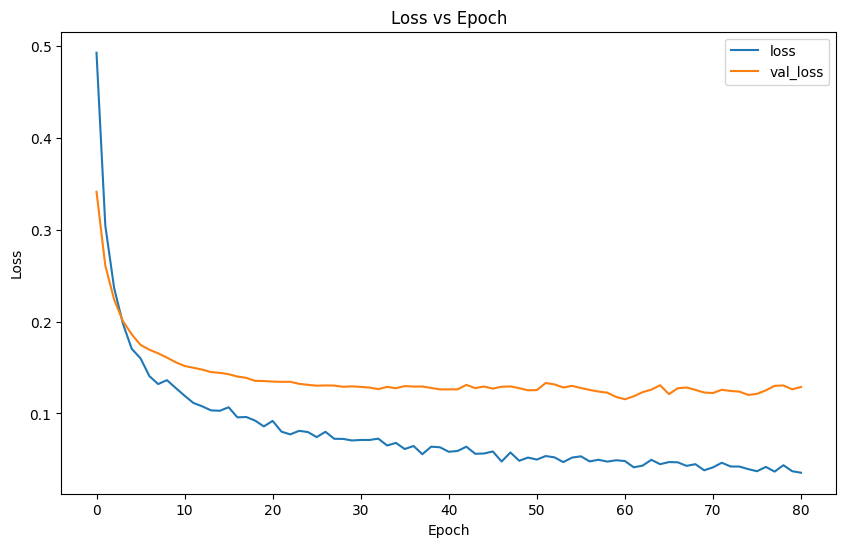

In [45]:
history_df = pd.DataFrame(history.history)

figure = plt.figure(figsize=(10, 6))
ax = plt.gca()
history_df.plot(y=["loss", "val_loss"], ax=ax)
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epoch")

plt.show()

### 2.4 Alpha óptima en validación + métricas finales en test

In [46]:

# ============================================================
#   Configuración de evaluación (simetría vs clase crítica)
# ============================================================
#
# True  -> clases simétricas -> optimizamos Accuracy
# False -> clase 1 crítica   -> optimizamos F1 con Recall mínimo
#
# ============================================================

CLASES_SIMETRICAS = False
RECALL_MIN = 0.95  # solo si CLASES_SIMETRICAS = False


def counts(y, yhat):
    TP = ((y == 1) & (yhat == 1)).sum()
    FP = ((y == 0) & (yhat == 1)).sum()
    TN = ((y == 0) & (yhat == 0)).sum()
    FN = ((y == 1) & (yhat == 0)).sum()
    return int(TP), int(FP), int(TN), int(FN)

def metrics_from_counts(TP, FP, TN, FN):
    denom = TP + TN + FP + FN
    acc = (TP + TN) / denom if denom else 0.0
    rec = TP / (TP + FN) if (TP + FN) else 0.0
    f1  = (2 * TP) / (2 * TP + FP + FN) if (2 * TP + FP + FN) else 0.0
    return float(acc), float(rec), float(f1)

def print_confusion_matrix(TP, FP, TN, FN, *, title="Matriz de confusión"):
    # Formato estándar:
    #            Pred 0     Pred 1
    # True 0       TN        FP
    # True 1       FN        TP
    print(f"\n{title}:")
    print("            Pred 0     Pred 1")
    print(f"True 0     {TN:8d}  {FP:8d}")
    print(f"True 1     {FN:8d}  {TP:8d}")

# ---- 6.1) Buscar alpha óptima en VALIDACIÓN ----
p_val = model.predict(X_val.astype(np.float32), verbose=0).ravel()

ALPHA_GRID = np.linspace(0.0, 1.0, 2001)  # paso 0.0005

best_alpha = None
best_val = -1.0

fallback_alpha = None
best_recall = -1.0

for a in ALPHA_GRID:
    yhat_val = (p_val >= a).astype(int)

    TP, FP, TN, FN = counts(y_val.values, yhat_val)
    acc, rec, f1 = metrics_from_counts(TP, FP, TN, FN)

    if CLASES_SIMETRICAS:
        # clases simétricas -> max accuracy
        if acc > best_val:
            best_alpha, best_val = float(a), float(acc)
    else:
        # clase 1 crítica -> max F1 con recall mínimo
        if rec >= RECALL_MIN and f1 > best_val:
            best_alpha, best_val = float(a), float(f1)

        # fallback: el que logre el mejor recall aunque no cumpla el mínimo
        if rec > best_recall:
            fallback_alpha, best_recall = float(a), float(rec)

ALPHA = best_alpha if best_alpha is not None else fallback_alpha

# ---- Mensajes obligatorios solicitados ----
metric_principal = "Accuracy" if CLASES_SIMETRICAS else "F1"

print("\n=== Configuración de decisión (binaria) ===")
print("Métrica principal:", metric_principal)
print("¿Clase positiva (1) crítica?:", (not CLASES_SIMETRICAS))
if not CLASES_SIMETRICAS:
    print("Recall mínimo exigido:", RECALL_MIN)
print("Alpha empleado (umbral):", ALPHA)

# ---- 6.2) Métricas finales en TEST usando ALPHA ----
p_test = model.predict(X_test.astype(np.float32), verbose=0).ravel()
yhat_test = (p_test >= ALPHA).astype(int)

TP, FP, TN, FN = counts(y_test.values, yhat_test)
acc, rec, f1 = metrics_from_counts(TP, FP, TN, FN)

test_metrics = {
    "TP": TP, "FP": FP, "TN": TN, "FN": FN,
    "accuracy": acc,
    "recall": rec,
    "f1": f1,
}

print_confusion_matrix(TP, FP, TN, FN, title="Matriz de confusión (TEST)")
# ---- Mostrar métricas como tabla ----
print("\nMétricas en test:")
print("-----------------------------------")
print(f"{'Métrica':<15} | {'Valor':>10}")
print("-----------------------------------")
print(f"{'Accuracy':<15} | {acc:10.4f}")
print(f"{'Recall':<15} | {rec:10.4f}")
print(f"{'F1':<15} | {f1:10.4f}")
print("-----------------------------------")




=== Configuración de decisión (binaria) ===
Métrica principal: F1
¿Clase positiva (1) crítica?: True
Recall mínimo exigido: 0.95
Alpha empleado (umbral): 0.1445

Matriz de confusión (TEST):
            Pred 0     Pred 1
True 0           68         2
True 1            2        40

Métricas en test:
-----------------------------------
Métrica         |      Valor
-----------------------------------
Accuracy        |     0.9643
Recall          |     0.9524
F1              |     0.9524
-----------------------------------


In [47]:
#@title ### 2.5. Guardando el modelo

import os
import json
import zipfile



OUT_DIR = "salida_binaria"
ZIP_NAME = "resultados.zip"

os.makedirs(OUT_DIR, exist_ok=True)

metadata = {
    "n_samples_train": int(d),
    "n_features": int(n0),
    "architecture": capas,
    "l2": float(l2_value),
    "dropouts": dropouts,
    "patience": int(patience),
    "min_delta": float(min_delta),
    "max_epochs": int(max_epochs),

    # --- claves para inferencia universal ---
    "alpha": float(ALPHA),

    # --- decisión / prioridad ---
    "clases_simetricas": bool(CLASES_SIMETRICAS),
    "clase_positiva_critica": bool(not CLASES_SIMETRICAS),
    "metrica_principal": metric_principal,
    "recall_min": None if CLASES_SIMETRICAS else float(RECALL_MIN),

    # --- resultados finales ---
    "metrics_test": test_metrics,
    "confusion_matrix_test": {
        "TN": TN, "FP": FP,
        "FN": FN, "TP": TP
    },
}

with open(os.path.join(OUT_DIR, "metadata.json"), "w") as f:
    json.dump(metadata, f, indent=2)

# Guardar modelo (ya entrenado)
model_path = os.path.join(OUT_DIR, "modelo.keras")
model.save(model_path)

# Guardar historial de entrenamiento (igual que regresión)
history_path = os.path.join(OUT_DIR, "historial_entrenamiento.csv")
pd.DataFrame(history.history).to_csv(history_path, index=False)

# Empaquetar todo en ZIP
with zipfile.ZipFile(ZIP_NAME, "w", zipfile.ZIP_DEFLATED) as zipf:
    for file in [model_path, history_path, os.path.join(OUT_DIR, "metadata.json")]:
        zipf.write(file, arcname=os.path.basename(file))

print(f"\n✔ ZIP generado correctamente: {ZIP_NAME}")


✔ ZIP generado correctamente: resultados.zip


## 3. Clasificando con los datos nuevos

In [52]:
cancer_new = pd.read_csv(datapath / 'cancer_nuevos.csv')
cancer_new_target = pd.read_csv(datapath / 'cancer_nuevos_target.csv')

print(cancer_new.tail(3))
print(cancer_new_target.tail(3))



   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
7        18.45         21.91          120.20     1075.0          0.09430   
8        13.15         15.34           85.31      538.9          0.09384   
9        14.48         21.46           94.25      648.2          0.09444   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
7           0.09709         0.11530              0.06847         0.1692   
8           0.08498         0.09293              0.03483         0.1822   
9           0.09947         0.12040              0.04938         0.2075   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
7                 0.05727  ...         22.52          31.39           145.60   
8                 0.06207  ...         14.77          20.50            97.67   
9                 0.05636  ...         16.21          29.25           108.40   

   worst area  worst smoothness  worst compactness  worst concavity  \
7 

In [74]:
new_processed = process_new_data_with_artifacts(cancer_new, artifacts)

Nuevos datos procesados: (10, 30)


In [77]:
new_predictions_proba = model.predict(new_processed, verbose=0).ravel()

In [78]:
prediction_df = pd.DataFrame({
    'Real Diagnosis': cancer_new_target['target'],
    'Predicción Prob': new_predictions_proba
})
prediction_df['Diagnosis Predicción'] = (prediction_df['Predicción Prob'] >= ALPHA).astype(int)
prediction_df['Coincidencia'] = (prediction_df['Real Diagnosis'] == prediction_df['Diagnosis Predicción']).astype(int)


prediction_df.sample(10, random_state=SEED)

,Real Diagnosis,Predicción Prob,Diagnosis Predicción,Coincidencia
4,0,0.000613,0,1
0,0,0.306143,1,0
7,1,0.999997,1,1
5,0,0.000003,0,1
8,0,0.011503,0,1
3,1,1.000000,1,1
1,0,0.004040,0,1
6,0,0.041119,0,1
9,1,0.926849,1,1
2,0,0.000306,0,1


In [79]:
TP, FP, TN, FN = counts(prediction_df['Real Diagnosis'], prediction_df['Diagnosis Predicción'])
print_confusion_matrix(TP, FP, TN, FN)


Matriz de confusión:
            Pred 0     Pred 1
True 0            6         1
True 1            0         3


In [80]:
n = len(cancer_new_target)
n_correct = prediction_df['Coincidencia'].sum()

aciertos_porcentaje = 100* (n_correct/n)

print(f"El modelo acertó {n_correct} de {n} ({aciertos_porcentaje:.2f}%)")
print(f'')

El modelo acertó 9 de 10 (90.00%)



## Conclusiones

El objetivo de este proyecto era desarrollar un modelo de clasificación binaria basado en Deep Learning para predecir la probabilidad de que un tumor sea maligno o benigno. A continuación, se presentan las conclusiones clave basadas en el entrenamiento y la evaluación del modelo:

1.  **Manejo del Desbalance de Datos**: Se identificó un desbalance en el conjunto de datos (37.39% malignos, 62.61% benignos). Para abordar esto, la estrategia de evaluación se centró en optimizar el puntaje F1 con un recall mínimo del 95% para la clase positiva (tumores malignos), lo cual es crucial en aplicaciones médicas donde los falsos negativos pueden tener consecuencias graves.

2.  **Rendimiento del Modelo en el Conjunto de Prueba**: Tras el entrenamiento, que incluyó Early Stopping para evitar el sobreajuste, el modelo demostró un rendimiento robusto en el conjunto de prueba:
    *   **Alpha (Umbral de Clasificación)**: Se determinó un umbral óptimo de `0.1445` para maximizar el F1-score cumpliendo el recall mínimo.
    *   **Métricas**: El modelo alcanzó una **precisión (accuracy)** del `96.43%`, un **recall** del `95.24%` y un **F1-score** del `95.24%`.
    *   **Matriz de Confusión**: En el conjunto de prueba, el modelo identificó correctamente 40 tumores malignos (**TP**) y 68 benignos (**TN**). Solo clasificó erróneamente 2 tumores benignos como malignos (**FP**) y 2 tumores malignos como benignos (**FN**). El bajo número de falsos negativos es especialmente relevante dado el objetivo de minimizar la no detección de cánceres malignos.

3.  **Predicciones con Datos Nuevos**: Al aplicar el modelo a un pequeño conjunto de 10 nuevos datos, se obtuvo un `90.00%` de aciertos. La matriz de confusión para estos nuevos datos mostró:
    *   **TP**: 3 (tumores malignos correctamente identificados)
    *   **FP**: 1 (tumor benigno clasificado como maligno)
    *   **TN**: 6 (tumores benignos correctamente identificados)
    *   **FN**: 0 (ningún tumor maligno fue clasificado erróneamente como benigno).
    Este resultado es muy positivo, ya que el modelo logró un `100%` de recall en los datos nuevos, es decir, no se perdió ningún caso de tumor maligno, lo cual refuerza su utilidad como apoyo diagnóstico.

**En resumen**, el modelo desarrollado es prometedor para la detección de tumores malignos, demostrando alta precisión y, fundamentalmente, un excelente recall para la clase crítica, lo que lo hace una herramienta valiosa para apoyar las decisiones médicas.